# PROG8245- Machine Learning Programming

# Project: Applying NLP to Major Tasks

### Team : Group 6
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 8965985     | Pradeepti                   | Kasam         |
| 9016987     | Keerthi                     | Gonuguntla    |
| 8964515     | Neha Dasharath              | Yadav         |

### Introduction

In this project, we delve into sentiment analysis within the context of customer feedback on products(amazon fine food reviews), aiming to gauge public opinion and improve user experience. One particular aspect of natural language processing is sentiment analysis which allows a business to identify not only the content of consumers’ feedback, but also the tone behind it that can inform decisions when developing new products and marketing campaigns. We implement a Naive Bayes model, recognized for its effectiveness and efficiency, to assess its performance using three distinct feature representation techniques: These include namely; Bag of Words (BoW), Term Frequency-Inverse Document Frequency (TF-IDF), and Word2Vec. This research aims to establish which of the three embedding techniques achieves the best classification accuracy of sentiments taking into consideration factors such as the problem of class imbalance in the data set used. The outcomes of this project will not only expand the knowledge of the current techniques for text classification and analysis but also contribute to creating guidelines for businesses to improve their products and services according to consumers’ opinions.

### 1. Data Collection :

#### Collect a dataset of product reviews

Here we are using the fine food reviews data to apply NLP.

#### **Kaggle Dataset** [Fine Food reviews from Amazon](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)

### Step 1 : Load the dataset

- Imports: Various libraries are imported to facilitate data manipulation, natural language processing (NLP)as well as machine learning:
    - pandas: For data handling and manipulation.
    - nltk: The Natural Language Toolkit, used in different text processing tasks.
    - sklearn: A library for machine learning which allow model training, evaluation, and data preprocessing to be done.
    - gensim: For overall word centered representations and topic modeling.
    - punkt: Tokenizers for breaking down text into either the sentence level or the word level.
    - stopwords: Prepositions such as ‘and’ or ‘the’ which are mostly stripped off the text in keyword generation.
    - wordnet: A database of lemmas of the English language useful for lemmatization
- Code Flow
    - Importing necessary libraries and downloading NLTK Resources before any data manipulation or analysis begins.

### Step 1 : Load the dataset

In [ ]:
#Necessary imports
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Mounting Google Drive: 
- Here we are enabling us to get the files in the Google Drive in a Google Colab platform.
- The files that are uploaded to the Google Drive can be directly used to read from or write to data.

Code Flow
- Google drive is mounted, allowing us to read files stored in the user’s drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the Dataset
- Reading CSV File: The pd.read_csv() brings a CSV file that feature product reviews into an efficient data structure, the Pandas DataFrame and stored in the variable ‘reviews_df’
- Previewing Data: The preliminarily view of the DataFrame is presented with a method reviews_df.head() where the interpreter shows 5 head samples.

Code Flow
- The CSV file is then, read into a DataFrame.
- The first 5 rows of the DataFrame are displayed to provide information concerning the data.

The output from reviews_df.head() provides a snapshot of the dataset's structure and contents, showing columns like:
- Id: A user ID would be assigned to every review.
- ProductId: Code that refers to the particular product under review.
- UserId: User id of the writer of the review.
- ProfileName: Name of the user.
- HelpfulnessNumerator and HelpfulnessDenominator: Indices for relevance of the reviews.
- Score: Rating given by the reviewer.
- Time: Timestamp of the review.
- Summary and Text: ; the Abstract of the review and the complete text of the abstract.
- This is important to establish even before going further in the analysis time series or in any other processing step


In [ ]:
reviews_df = pd.read_csv('Reviews.csv')
reviews_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Step 2: Annotating Sentiment Based on Ratings

- We are downloading the VADER lexicon and initializing the SentimentIntensityAnalyzer. VADER is a rule-based sentiment analysis tool specifically attuned to sentiments expressed in social media. VADER is pre-trained and effective for social media text, considering punctuation, capitalization, and emoticons. SentimentIntensityAnalyzer class from the NLTK library will be used to calculate sentiment scores for text data.
- The function analyze_sentiment() accepts a text string, computes the sentiment scores, and classifies the sentiment based on the compound score. It uses VADER to calculate polarity scores for the input text. The compound score, a normalized sum of valence scores, determines the overall sentiment. Thresholds of 0.05 and -0.05 are used to classify sentiments.
    - Positive Sentiment: A compound score of 0.05 or above indicates a positive sentiment.
    - Negative Sentiment: A compound score of -0.05 or below indicates a negative sentiment.
    - Neutral Sentiment: Scores that fall between -0.05 and 0.05 are classified as neutral.
- Then we are applying sentiment analysis function to each row in the Text column, creating a new column Predicted_Sentiment that contains the sentiment classification.
- Later, we are printing the first few rows of the Text, Score, and Predicted_Sentiment columns along with the number of occurrences of each sentiment label (positive, negative, neutral).


In [ ]:
# Downloading the VADER lexicon
nltk.download('vader_lexicon')

# Initializing the VADER sentiment analyzer to analyse the Text column in the dataset
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    # Determining the sentiment scores
    sentiment_scores = sia.polarity_scores(text)

    # Classifying the sentiment based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive' #if the sentiment score is grater than or equals to 0.05 then that is positive
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative' #if the sentiment score is less than - 0.05 then that is negatitive
    else:
        return 'neutral' #If the sentiment score is between the -0.05 and 0.05 the that is neutral

# Applying sentiment analysis to reviews (Text Column)
reviews_df['Predicted_Sentiment'] = reviews_df['Text'].apply(analyze_sentiment)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Displaying results
reviews_df[['Text', 'Score', 'Predicted_Sentiment']].head()


,Text,Score,Predicted_Sentiment
0,I have bought several of the Vitality canned d...,5,positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,negative
2,This is a confection that has been around a fe...,4,positive
3,If you are looking for the secret ingredient i...,2,neutral
4,Great taffy at a great price. There was a wid...,5,positive


In [ ]:
print(reviews_df['Predicted_Sentiment'].value_counts())

Predicted_Sentiment
positive    496967
negative     59333
neutral      12154
Name: count, dtype: int64


- The dataset is heavily skewed towards positive sentiments. There's a significant imbalance between positive and negative reviews. Neutral reviews are the least common.

### 2. Preprocessing

Here some pre-processing will be done to filter out unwanted components of the text and convert the data into a cleaned string desirable for analysis.
- Lowercasing: Converting all text to lowercase is standardized where “Dog” is equal to “dog”. This is important for dimensional reduction since it eliminates the creation of new token every time there is a difference in capitalization.
- Tokenization: The word_tokenize function helps to split the text to the words that are also referred to as tokens. Tokenization lets the model to process text with respect to words.
- Removing Punctuation: With exception to apostrophes, certain subsidiary punctuations are erased to emphasize on the words themselves. This is important because aside from being a set of marks that is inserted in between the words of a text, it does not affect the input or feel of the text.
- Stop Word Removal: Stoppers are words, which are noise, and do not contain much information such as “and” “the”. This is useful in a way that it minimizes noise in the datasets and increases the effectiveness of the analysis.
- Lemmatization: This technique brings down words to the simplest form (stemming for example, where “running” is reduced to “run”). Lemmatization reduces the list of words but retains their meaning additional information is always useful in improving the model’s performance.
- Joining Tokens: The produced tokens are concatenated back into one string again which can be useful for further examination.

In [ ]:
def preprocess_text(text):
    # Converting to the Lowercase the text
    text = text.lower()

    # Tokenizing the text
    tokens = word_tokenize(text)

    # Removing punctuation marks in the text
    tokens = [token for token in tokens if token not in string.punctuation]

    # Removing stop words in the text
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization of the text
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Joining tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text # Returning preprocessed Text

# Applying preprocessing to the 'Text' column
reviews_df['Preprocessed_Text'] = reviews_df['Text'].apply(preprocess_text)

- Below we are displaying the shape of DataFrame to give an overview of how many rows and columns it contains.
- Also, printing the summary of missing values for each column for ensuring the integrity of the dataset and for determining how to handle these missing values effectively.

Remove any irrelevant columns, handle missing values, and clean text data by removing special characters, stopwords, and performing stemming/lemmatization.

In [ ]:
#Printing the shape of the data set
print(f'Shape of the dataset: {reviews_df.shape}')

# Checking for missing values
print("\nMissing Values Summary:")
print(reviews_df.isnull().sum())

Shape of the dataset: (568454, 12)

Missing Values Summary:
Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
Predicted_Sentiment        0
Preprocessed_Text          0
dtype: int64


- Filling Numeric Missing Values: Numeric columns are filled with a default value (0 in this case). This prevents errors during analysis or modeling that can arise from missing values.
- Filling Text Missing Values: Text columns are filled with "Unknown" as a placeholder to maintain the integrity of the dataset without introducing bias.
- This will help us to prevents errors in downstream operations by ensuring no missing values remain and will allow analysis without losing rows of data.

In [ ]:
# Handling missing values
# Replacing missing values in numeric columns with the mean
numeric_columns = reviews_df.select_dtypes(include=['float64', 'int64']).columns
reviews_df[numeric_columns] = reviews_df[numeric_columns].fillna(0)

# Replacing missing values in string/text columns with a placeholder --> "Unknown"
text_columns = reviews_df.select_dtypes(include=['object']).columns
reviews_df[text_columns] = reviews_df[text_columns].fillna("Unknown")

In [ ]:
# Checking after handling missing values is their missing values in the dataset or not
print("Missing Values After Filling:")
print(reviews_df.isnull().sum())

Missing Values After Filling:
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
Predicted_Sentiment       0
Preprocessed_Text         0
dtype: int64


#### Cleaning Text Data

To get cleaned text which is free from noise, making it suitable for analysis. The cleaned text retains the essential words necessary for sentiment analysis:
- Lowercasing: Similar to the previous preprocessing, converting to lowercase standardizes the text.
- Removing URLs: This ensures that any web links do not interfere with the sentiment analysis. URLs often do not contribute meaningfully to the content.
- Handling Hashtags: Hashtags are stripped of the # symbol to treat the underlying word as a regular token.
- Removing Emojis: Emojis can be complex to interpret. They are converted to their textual representation and then removed to avoid introducing noise.
- Removing Special Characters: Non-alphabetic characters and digits are removed to focus on the actual words.
- Tokenization and Stop Word Removal: The cleaned text is tokenized, and stop words are removed, followed by lemmatization.

After applying cleaning function it removes noise and dataset-specific challenges like emojis, hashtags, and URLs.

Handle specific challenges of used text like hashtags, emojis, and slang.

In [ ]:
#Importing the required libraries
import emoji
import re

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Converting to lowercase
    text = text.lower()

    # Removing the URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Handling hashtags -> remove # symbol
    text = re.sub(r'#(\w+)', r'\1', text)

    # Removing emojis
    text = emoji.demojize(text)
    text = re.sub(r':[a-z_]+:', '', text)

    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Removing stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(cleaned_tokens) #Joining the all words

# Applying the cleaning function to your dataset
reviews_df['Cleaned_Text'] = reviews_df['Text'].apply(clean_text)

# Displaying a sample of the cleaned text
reviews_df[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


3. Feature Extraction and Model Comparison

A. Bag-of-Words (BoW)
- Technique Overview:
    - The Bag-of-Words model describes text by list of words ignoring the grammatical structure, arranging words by their frequency.
    - It produces a matrix which has the number of rows equal the number of documents and number of column equal to the number of unique word in the whole corpus.
    - Frequency of each word is applied in order to form a feature vector for the machine learning operation
    - Both text samples are then converted into vectors in which each element is a word of the given vocabulary, and the element value is the word frequency.
- Code Flow:
    - The cleaned text data is extracted from the DataFrame.
    - A CountVectorizer is initialized to fit the vectorizer to the data convert the text into a matrix of token counts.
    - The fit_transform function is called to learn the vocabulary and transform the text into a BoW representation which is a sparse matrix with a size equal to the number of unique words in the dataset.
- Why we are using this?
    - Effective for high-dimensional sparse datasets.
    - BoW is computationally efficient and works well for text classification tasks where word occurrence is a key feature.
    - But may not capture semantic meanings or relationships between words.

In [ ]:
# Bag-of-Words
Cleaned_Text = reviews_df['Cleaned_Text']
print("Extracting Bag-of-Words features...")
bow_vectorizer = CountVectorizer()
bow_features = bow_vectorizer.fit_transform(Cleaned_Text)
print(bow_features)

Extracting Bag-of-Words features...
  (0, 20284)	1
  (0, 160853)	1
  (0, 197008)	1
  (0, 26426)	1
  (0, 52611)	1
  (0, 68917)	1
  (0, 142351)	3
  (0, 70120)	1
  (0, 76512)	1
  (0, 145344)	1
  (0, 104197)	1
  (0, 102334)	1
  (0, 172452)	1
  (0, 142182)	1
  (0, 109510)	1
  (0, 165629)	1
  (0, 16312)	2
  (0, 99259)	1
  (0, 66154)	1
  (0, 8312)	1
  (1, 142351)	2
  (1, 9215)	1
  (1, 99117)	1
  (1, 95844)	2
  (1, 155815)	1
  :	:
  (568452, 76512)	1
  (568452, 188486)	2
  (568452, 64450)	1
  (568452, 104689)	1
  (568452, 177695)	1
  (568452, 16076)	1
  (568452, 122119)	1
  (568452, 159316)	1
  (568452, 25573)	1
  (568452, 139342)	1
  (568452, 200647)	1
  (568452, 104938)	1
  (568452, 188034)	1
  (568452, 52698)	1
  (568452, 152221)	1
  (568452, 79350)	1
  (568453, 142351)	1
  (568453, 194139)	1
  (568453, 156793)	1
  (568453, 147126)	1
  (568453, 1980)	1
  (568453, 177972)	1
  (568453, 29300)	1
  (568453, 196670)	1
  (568453, 74048)	1


In [ ]:
print("Bag-of-Words features shape:", bow_features.shape)

Bag-of-Words features shape: (568454, 207192)


568454 - Number of documents

207192 - Total number of unique words or tokens identified


B. TF-IDF (Term Frequency-Inverse Document Frequency)
- Technique Overview:
    - TF-IDF improves upon BoW by also considering the importance of words. It calculates the frequency of a term in a document while penalizing common words that appear across many documents.
    - How??
        - Computes term frequency (TF): Frequency of a word in a document.
        - Computes inverse document frequency (IDF): Logarithmic measure of how rare a word is across documents.
        - Multiplies TF by IDF to get the TF-IDF weight.
- Code Flow:
    - A TfidfVectorizer is initialized converting text into TF-IDF weighted features.
    - fit_transform Fits the vectorizer and transforms the text by computing TF-IDF score for each term in the document.
    - Similar to BoW, tfidf_features.shape displays the number of documents and features i.e. Sparse matrix with weights reflecting word importance, indicating the TF-IDF representation.
- Why we are using this?
    - Better than BoW for capturing the importance of words.
    - TF-IDF helps to reduce the weight of common words and highlights more informative words, making it suitable for distinguishing between different classes in text classification.

In [ ]:
# TF-IDF
print("Extracting TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(Cleaned_Text)
print(tfidf_features)

Extracting TF-IDF features...
  (0, 20284)	0.13968668486066238
  (0, 160853)	0.1736908095574905
  (0, 197008)	0.3343004419994575
  (0, 26426)	0.20898398836567464
  (0, 52611)	0.13777663395203454
  (0, 68917)	0.12117817447492941
  (0, 142351)	0.29958962455682103
  (0, 70120)	0.13771921107864885
  (0, 76512)	0.0917312900057533
  (0, 145344)	0.15699192716227356
  (0, 104197)	0.16603862997492222
  (0, 102334)	0.0852114431942932
  (0, 172452)	0.279416382841238
  (0, 142182)	0.2450998710234203
  (0, 109510)	0.1974762680888658
  (0, 165629)	0.1657893466719918
  (0, 16312)	0.2567025878536437
  (0, 99259)	0.3288378373590202
  (0, 66154)	0.2642889470313167
  (0, 8312)	0.36891790168965505
  (1, 142351)	0.15887791553597222
  (1, 9215)	0.14358642226816587
  (1, 99117)	0.219979320689585
  (1, 95844)	0.5520950155084353
  (1, 155815)	0.21851203532617455
  :	:
  (568452, 76512)	0.0969520033251946
  (568452, 188486)	0.309479872538993
  (568452, 64450)	0.15214130373240034
  (568452, 104689)	0.18485644918

In [ ]:
print("TF-IDF features shape:", tfidf_features.shape)

TF-IDF features shape: (568454, 207192)


C. Word2Vec
- Technique Overview:
    - Word2Vec training algorithm learns vectorized representations of words in the manner that the words having more similar meanings used closer vectors.
    - It handles the contextual relationships, and semantic meanings making it superior to BoW or TF-IDF methods. That it does with the help of a neural network, which gives out context words (CBOW) or target words (Skip-gram) based on surrounding words.
    - Example: Retains semantic interaction of words, that is, it captures semantic equations such as ‘king’ - ‘man’ + ‘woman’ ≈ ‘queen’.
- Code Flow:
    - The cleaned text is tokenized into lists of words.
    - Then Word2Vec model is trained on the tokenized texts, specifying parameters like vector_size (dimension of word vectors), window (context window size), and min_count (minimum frequency).
    - Later, compute_average_word2vec() computes the average of the word vectors for each document. If no words are found in the model, it returns a zero vector.
    - word2vec_features provides a dense representation of documents based on word semantics.
- Why we are using this?
    - Word2Vec captures contextual information, making it particularly effective for semantic/syntactic analysis and understanding relationships between words.
    - Requires significant computational resources compared to BoW or TF-IDF.

In [ ]:
# Word2Vec (using Gensim)
print("Training Word2Vec model...")
tokenized_texts = [text.split() for text in Cleaned_Text]
word2vec_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Compute average Word2Vec features per text
print("Computing Word2Vec features...")
def compute_average_word2vec(text, model, vector_size):
    words = text.split()
    feature_vec = [model.wv[word] for word in words if word in model.wv]
    if feature_vec:
        return sum(feature_vec) / len(feature_vec)
    else:
        return [0] * vector_size

word2vec_features = [compute_average_word2vec(text, word2vec_model, 100) for text in Cleaned_Text]

print("Word2Vec features shape:", len(word2vec_features), "x", len(word2vec_features[0]))

Training Word2Vec model...
Computing Word2Vec features...
Word2Vec features shape: 568454 x 100


568454 - Number of documents

100 - This represents the size of the word vector space, also known as the embedding dimension.

### 2. Model Building

Naive Bayes is a fast-paced method for sentiment analysis in customer feedback applications because it is computationally efficient, handles large feature spaces well, and performs surprisingly well with relatively small amounts of training data. Additionally, it is simple to implement and interpret compared to SVM and neural networks.

A. Naive Bayes with Bag-of-Words
- Technique Overview:
    - Naive Bayes is a probabilistic classifier based on Bayes' theorem, assuming independence between features. It computes the probability of each class given the feature vector
    - Suitable for high-dimensional data like BoW, making it ideal for text classification.
- Code Flow:
    - The target sentiment labels are extracted.
    - Then dataset is split into training and testing sets using an 80-20 split.
    - Later, Naive Bayes model is instantiated and trained on the Bag-of-Words features.
    - The model is evaluated by predicting on both training and testing sets, calculating accuracy scores.
- Our Analysis:
    - The classification report provides precision, recall, and F1-score metrics for each class. High accuracy for positive sentiment but struggles with neutral and negative sentiments due to class imbalance.

In [ ]:
# Split the dataset into training and testing sets
Sentiment = reviews_df['Predicted_Sentiment']
X_train, X_test, y_train, y_test = train_test_split(bow_features, Sentiment, test_size=0.2, random_state=42)

# Model Building using Naive Bayes
print("Training Naive Bayes model...")
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
print("Evaluating the model...")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy: {:.2f} %".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f} %".format(test_accuracy * 100))
print("Classification Report on Testing Data:\n", classification_report(y_test, test_predictions))


Training Naive Bayes model...
Evaluating the model...
Training Accuracy: 89.47 %
Testing Accuracy: 88.23 %
Classification Report on Testing Data:
               precision    recall  f1-score   support

    negative       0.52      0.47      0.50     11922
     neutral       0.44      0.04      0.07      2410
    positive       0.92      0.95      0.94     99359

    accuracy                           0.88    113691
   macro avg       0.63      0.49      0.50    113691
weighted avg       0.87      0.88      0.87    113691



B. Naive Bayes with TF-IDF
- Technique Overview:
    - Using TF-IDF improves classification by reducing the influence of common words.
- Code Flow:
    - Similar to the BoW method, but using tfidf_features instead of bow_features.
- Our Analysis:
    - Slightly lower accuracy compared to BoW due to the weighting mechanism reducing the impact of frequent words.
    - Better performance in handling negative reviews compared to BoW, but still poor with neutral reviews.

With TF-IDF

In [ ]:
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(tfidf_features, Sentiment, test_size=0.2, random_state=42)

print("Training Naive Bayes model with TF-IDF...")
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

# Evaluate the model with TF-IDF
print("Evaluating the model with TF-IDF...")
train_predictions_tfidf = model_tfidf.predict(X_train_tfidf)
test_predictions_tfidf = model_tfidf.predict(X_test_tfidf)

train_accuracy_tfidf = accuracy_score(y_train, train_predictions_tfidf)
test_accuracy_tfidf = accuracy_score(y_test, test_predictions_tfidf)

print("TF-IDF Training Accuracy: {:.2f} %".format(train_accuracy_tfidf  * 100))
print("TF-IDF Testing Accuracy: {:.2f} %".format(test_accuracy_tfidf * 100))
print("TF-IDF Classification Report:\n", classification_report(y_test, test_predictions_tfidf))


Training Naive Bayes model with TF-IDF...
Evaluating the model with TF-IDF...
TF-IDF Training Accuracy: 87.59 %
TF-IDF Testing Accuracy: 87.50 %
TF-IDF Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.01      0.03     11922
     neutral       0.60      0.01      0.01      2410
    positive       0.88      1.00      0.93     99359

    accuracy                           0.87    113691
   macro avg       0.73      0.34      0.32    113691
weighted avg       0.85      0.87      0.82    113691



C. Naive Bayes with Word2Vec
- Technique Overview:
    - . Naive Bayes is suitable for dense feature representations like Word2Vec embeddings.
- Code Flow:
    - Fits a Naive Bayes model to the data.
- Our Analysis:
    - Similar accuracy to BoW and TF-IDF, but better captures semantic relationships.
    - Similar challenges with the neutral class, indicating that the model may not effectively capture nuances in neutral sentiment.

With Word2Ve

In [ ]:
# Convert Word2Vec features to DataFrame for compatibility
import numpy as np
word2vec_features = np.array(word2vec_features)
X_train_w2v, X_test_w2v, _, _ = train_test_split(word2vec_features, Sentiment, test_size=0.2, random_state=42)

# TO handle negative values in the data set
X_train_w2v = np.abs(X_train_w2v)
X_test_w2v = np.abs(X_test_w2v)


print("Training Naive Bayes model with Word2Vec features...")
model_w2v = MultinomialNB()
model_w2v.fit(X_train_w2v, y_train)

# Evaluate the model with Word2Vec features
print("Evaluating the model with Word2Vec features...")
train_predictions_w2v = model_w2v.predict(X_train_w2v)
test_predictions_w2v = model_w2v.predict(X_test_w2v)

train_accuracy_w2v = accuracy_score(y_train, train_predictions_w2v)
test_accuracy_w2v = accuracy_score(y_test, test_predictions_w2v)

print("Word2Vec Training Accuracy: {:.2f} %".format(train_accuracy_w2v * 100))
print("Word2Vec Testing Accuracy: {:.2f} %".format(test_accuracy_w2v * 100))
print("Word2Vec Classification Report:\n", classification_report(y_test, test_predictions_w2v))


Training Naive Bayes model with Word2Vec features...
Evaluating the model with Word2Vec features...
Word2Vec Training Accuracy: 87.44 %
Word2Vec Testing Accuracy: 87.39 %
Word2Vec Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.00      0.00     11922
     neutral       0.00      0.00      0.00      2410
    positive       0.87      1.00      0.93     99359

    accuracy                           0.87    113691
   macro avg       0.62      0.33      0.31    113691
weighted avg       0.87      0.87      0.82    113691



### Visualisation

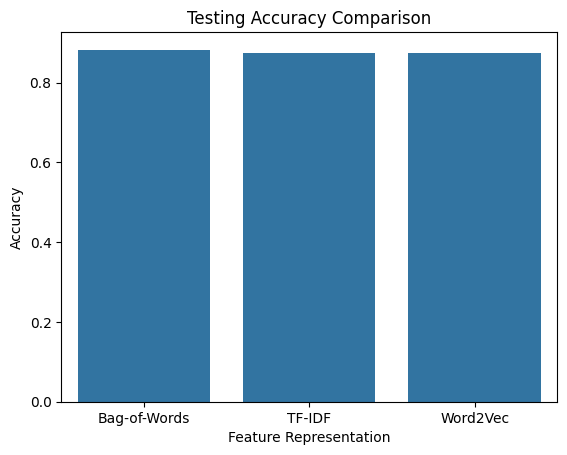

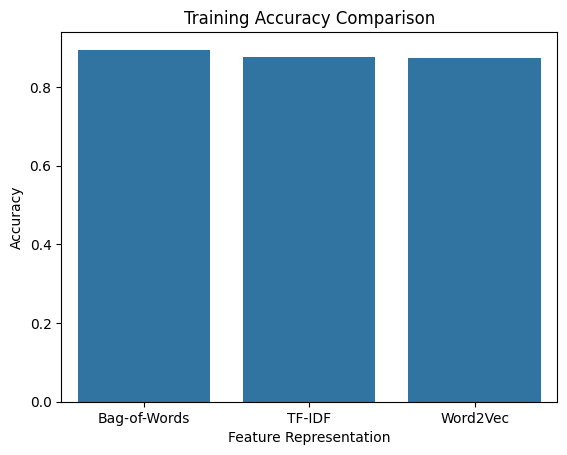

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualization
results = {
    "Feature Representation": ["Bag-of-Words", "TF-IDF", "Word2Vec"],
    "Training Accuracy": [train_accuracy, train_accuracy_tfidf, train_accuracy_w2v],
    "Testing Accuracy": [test_accuracy, test_accuracy_tfidf, test_accuracy_w2v]
}

results_df = pd.DataFrame(results)

# Plot the results
sns.barplot(x="Feature Representation", y="Testing Accuracy", data=results_df)
plt.title("Testing Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Feature Representation")
plt.show()

sns.barplot(x="Feature Representation", y="Training Accuracy", data=results_df)
plt.title("Training Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Feature Representation")
plt.show()


The results are compiled into a DataFrame for easy visualization:

Bar plots are generated to compare testing and training accuracies across different feature representations.

- **Testing Accuracy Comparison:**
    - Bar plots show similar testing accuracy across all feature representations.
    - BoW slightly outperforms TF-IDF and Word2Vec for this dataset and model.
- **Training Accuracy Comparison:**
    - High training accuracy for all methods, indicating good model performance on training data.

### Conclusion

- Analysis of Results:
    - Feature representation impacts model performance significantly. Hence, the choice of embedding technique should align with the dataset characteristics and task requirements.
    - Bag-of-Words performed slightly better in this setup due to the simplicity of the dataset and class imbalance.
    - Word2Vec could excel with more balanced data and advanced models.
    - TF-IDF is a good compromise, reducing the impact of frequent words while retaining meaningful features.
    - The choice of embedding technique should depend on the specific text classification task.

- Best Embedding Technique: Bag-of-Words (BoW): 
    - While all three techniques yielded comparable overall accuracy, BoW emerges as the best feature representation technique for this particular sentiment analysis task:
    - Simplicity and Efficiency:
        - BoW is straightforward to implement and computationally efficient, making it suitable for high-dimensional datasets.
    - Compatibility with Naive Bayes:
        - BoW aligns well with Naive Bayes' assumptions, leading to optimal performance for text classification tasks.
    - Dataset Characteristics:
        - The dataset's class imbalance and high proportion of positive sentiment data favored the straightforward frequency-based approach of BoW.